In [163]:
import liora
import odilon
import utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [164]:
dado = utils.carregar_dados_todos_anos()

## 1. Como se comportam os gastos com cotas parlamentares ao longo do tempo? Existe alguma tendência de aumento ou redução desse custo?

Para entender o comportamento dos gastos, precisamos entender como funciona o Acúmulo da Cota Parlamentar

## Como funciona o Acúmulo da Cota Parlamentar?

O valor da cota pode ser acumulado durante o Exercício Financeiro. O que sobra de um Exercício Financeiro não pode ser utilizado no Exercício Financeiro Seguinte.
Um Exercicio Financeiro possui duração de um ano. Começando a partir do dia 01 de janeiro do referido ano.

Com isso em mente, podemos concluir que:
- O mês de menor gasto, é Abril de 2020, mês posterior à Pandemia causada pelo Covid-19.
- O dinheiro acumulou-se e o prazo máximo para consumir esse dinheiro era dezembro de 2020.
- Tendo isso em mente, provavelmente o final do exercício de parlamentar deve ter os maiores gastos.
- Logo, percebemos que o mês com maior gasto é dezembro de 2020 (final do Exercício Financeiro de 2020), confirmando a hipótese acima. 

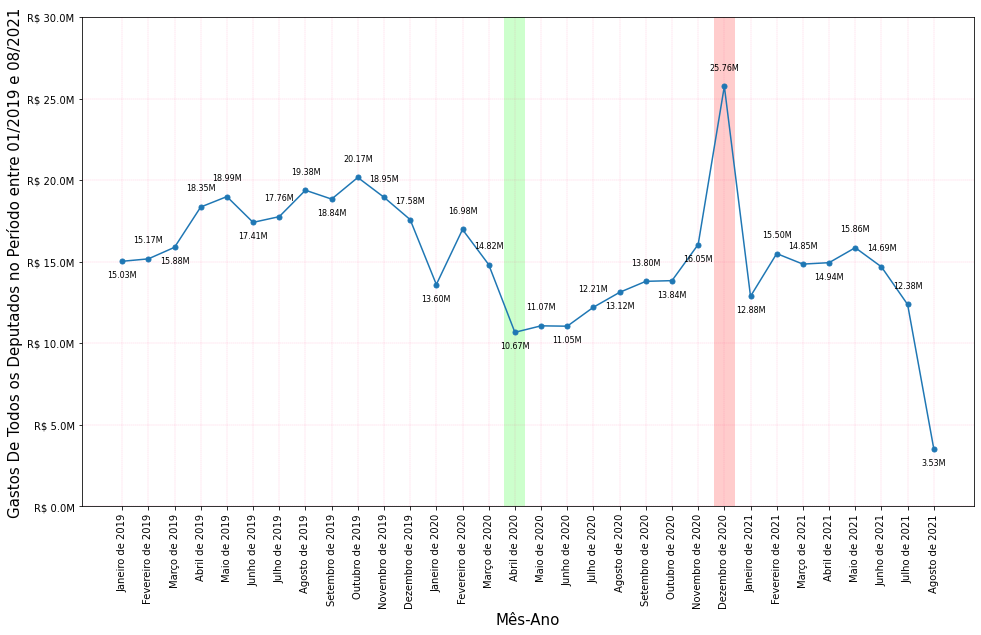

In [176]:
base = 1000000

minimo, maximo = 0, 30_000_000


colunas_analisadas = ['numAno', 'numMes', 'vlrDocumento', 'vlrLiquido']
analise = dado[colunas_analisadas]
analise_por_mes = analise.groupby(['numAno', 'numMes']).sum()

fig, ax = plt.subplots()
fig.patch.set_facecolor('white')

analise_por_mes.vlrDocumento.plot(style='-o', ax=ax, figsize=(16, 9), ms=5)

indices = analise_por_mes.index.to_frame()
indices = indices.numMes.astype(str) + '/' + indices.numAno.astype(str)
indices = indices.to_numpy()
indices = utils.formatar_datas_para_rotulo(pd.Series(indices))

min_y, max_y = utils.gerar_limites_eixo_y(
    analise_por_mes.vlrDocumento.to_numpy())
yticks = np.linspace(minimo, maximo, 7)

ax.set_xticks(range(len(indices)))
ax.set_xticklabels(indices, rotation=90)
ax.grid(color=(1, 0.2, 0.5, 0.3), linestyle=':', linewidth=0.25)
ax.set_ylim([min_y, max_y])
ax.set_xlabel('Mês-Ano', fontsize=15)
ax.set_ylabel(
    'Gastos De Todos os Deputados no Período entre 01/2019 e 08/2021', fontsize=15)

ax.set_yticks(yticks)

yticks = [f'R$ {x/1000000}M' for x in yticks]
ax.set_yticklabels(yticks)

valores = analise_por_mes.vlrDocumento.to_numpy()
valores = np.concatenate(([max_y], valores, [max_y]))

direcao_desvio = np.sign(np.diff(valores))
direcao_desvio[[2, 19, 21, 22, 27]] = -1
direcao_desvio[[10, 11, 14, 20, 26, 29, 30]] = 1
desvios = direcao_desvio * (max_y/30)

interate = zip(desvios, analise_por_mes.vlrDocumento.to_numpy())


for eixo_x, (desvio_y, valor) in enumerate(interate):
    valor_sem_resto = valor - (valor % (base/100))
    coordenadas = (eixo_x, valor_sem_resto + desvio_y)
    ax.annotate(f'{(valor_sem_resto/base):4.2f}M',
                coordenadas, fontsize=8, ha='center')

# plt.savefig('Gasto Total sem Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.bar([23, 15], [max_y, max_y], color=['#ffcccc', '#ccffcc'])
# plt.savefig('Gasto Total com Barra Vertical.png', dpi=150, bbox_inches='tight')
plt.show()

## 2. Qual a Média de Gastos por Parlamentar?

In [166]:
colunas_analisadas = ['vlrLiquido', 'vlrDocumento', 'txNomeParlamentar']
soma_gasto_parlamentar = utils.soma_gastos(dado[colunas_analisadas]).sort_values(colunas_analisadas)


numeric_columns = soma_gasto_parlamentar.select_dtypes(float).columns
soma_gasto_parlamentar[numeric_columns] = soma_gasto_parlamentar[numeric_columns].apply(lambda x:x/31)
soma_gasto_parlamentar.iloc[np.r_[0:5, -5:0]]

,txNomeParlamentar,vlrLiquido,vlrDocumento
399,Jorge Goetten,-787.18,"1,339.22"
703,Renato Queiroz,-293.78,846.89
254,FELIPE BORNIER,-54.03,-54.03
464,LUCIANA SANTOS,0.02,0.02
515,MANDETTA,0.02,0.02
418,João Maia,"42,939.72","42,962.77"
277,Flaviano Melo,"42,959.63","43,525.87"
757,Silas Câmara,"43,851.98","44,314.68"
828,Wellington Roberto,"44,066.44","44,680.35"
431,Jéssica Sales,"45,660.00","45,681.72"


## 3. Quais foram os parlamentares que mais e que menos consumiram recursos?


### Deputada que mais gastou. 

A parlamentar que mais consumiu Cota Parlamentar foi a Deputadada Jéssica Sales.
Podemos levar em consideração que o Acre possui os maiores valores de cota devido à dificuldade em chegar ao Distrito Federal.

### Deputado que menos gastou.

A parlamentar que menos consumiu Cota Parlamentar foi a Deputadada Felipe Bornier.
Entretanto, os valores encontrados foram do mandato passado e além disso, ele renunciou logo no começo do mandato.

In [167]:
idx = [
    soma_gasto_parlamentar.vlrDocumento.idxmax(), 
    soma_gasto_parlamentar.vlrDocumento.idxmin()]

print(idx)

soma_gasto_parlamentar.loc[idx]

[431, 254]


,txNomeParlamentar,vlrLiquido,vlrDocumento
431,Jéssica Sales,"45,660.00","45,681.72"
254,FELIPE BORNIER,-54.03,-54.03


## 4. Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?

A categoria com maior despesa é a Divulgação da Atividade Parlamentar, com um gasto de aproximandade 138 Milhões de Reais, isso inclui televisão, website, rádio, mídias sociais, entre outros.

txtDescricao
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.            137,173,739.89
PASSAGEM AÉREA - RPA                             72,410,281.97
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES    67,401,578.92
Name: vlrLiquido, dtype: float64

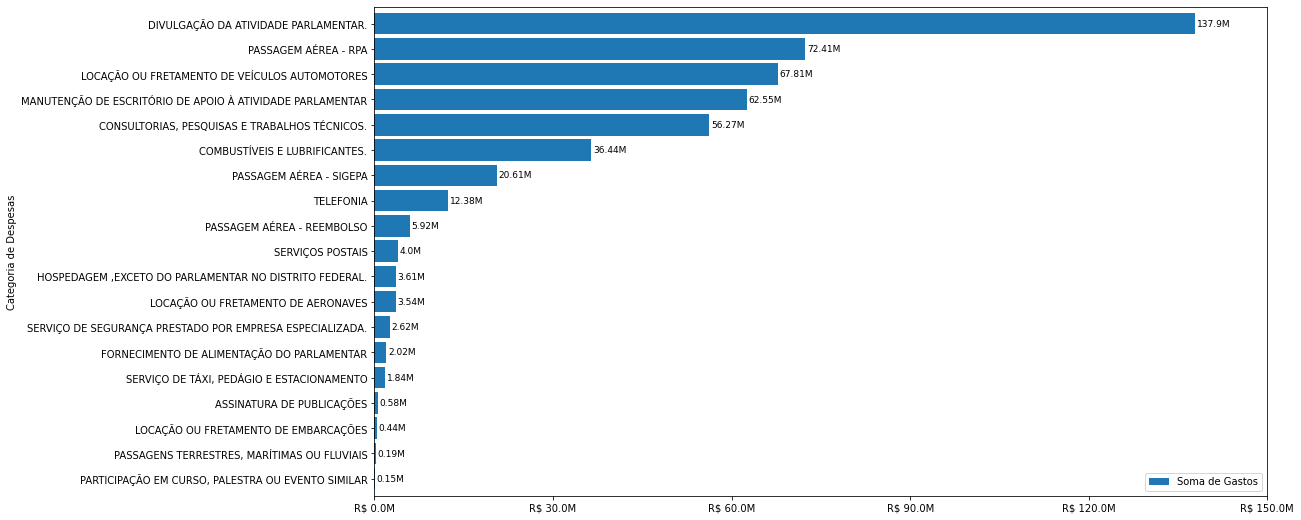

In [168]:
display(liora.categoria_despesa_onerosa(dado))

col = ['txtDescricao', 'vlrDocumento']
gastos_estado = dado[col]
sgc = utils.soma_gastos(gastos_estado)
sgc = sgc.sort_values('vlrDocumento')
sgc.columns = ['Categoria de Despesas', 'Soma de Gastos']

mx = 150_000_000

fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
sgc.set_index('Categoria de Despesas').plot.barh(
    figsize=(16,9),
    width=.85,
    ax=ax
)

ax.set_facecolor('white')

# Ajustar As Anotações
ax.set_xlim(0, mx)
labels = (sgc['Soma de Gastos'] / 1_000_000).round(2).to_numpy()
for x, y in enumerate(sgc['Soma de Gastos']):
    text = f'{labels[x]}M'
    ax.annotate(text,(y + 250000, x), va='center', fontsize=9)
ax.legend(loc=4)

# Ajustar o Eixo X

yticks = [x for x in range(0, mx+1, int(mx/5))]
ax.set_xticks(yticks)


yticks = [f'R$ {x/1000000}M' for x in yticks]
ax.set_xticklabels(yticks);


## 5. Quais são os trechos de viagem mais recorrentes entre as despesas de viagem?

O trecho mais recorrente é de Brasília para Brasília, uma possível explicação é o fato dos candidatos poderem alugar aeronaves para facilitar a locomoção dentro da cidade de Brasilia.

In [169]:
liora.trecho_viagem_recorrente(dado)

BSB/BSB    9890
BSB/CGH    5083
CGH/BSB    4912
Name: txtTrecho, dtype: int64

## 6. Qual a média de gastos por estado?

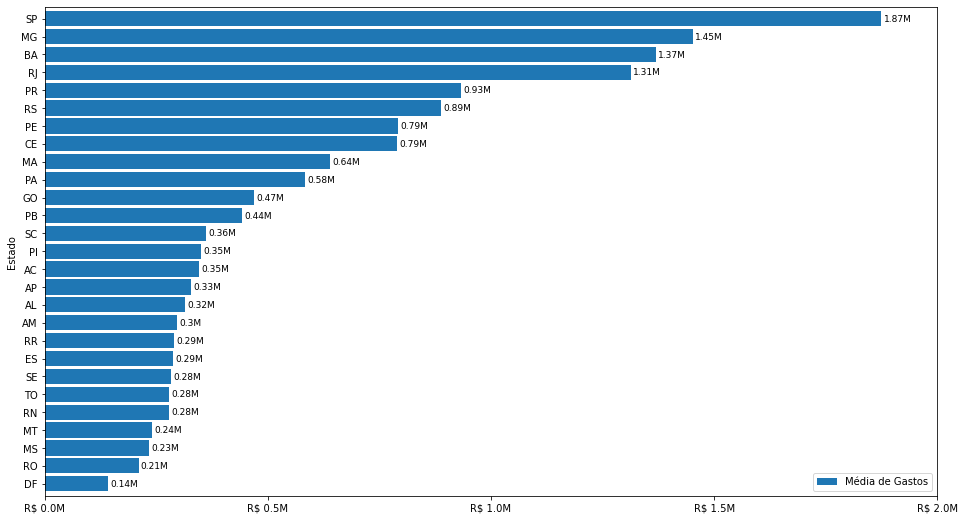

In [172]:
col = ['sgUF', 'vlrDocumento']
gastos_estado = dado[col]
sge = utils.soma_gastos(gastos_estado)
sge.vlrDocumento = sge.vlrDocumento / 31
sge = sge.sort_values('vlrDocumento')
sge.columns = ['Estado', 'Média de Gastos']

mx = 2_000_000

fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
sge.set_index('Estado').plot.barh(
    figsize=(16,9),
    width=.85,
    ax=ax
)

ax.set_facecolor('white')

# Ajustar As Anotações
ax.set_xlim(0, mx)
labels = (sge['Média de Gastos'] / 1_000_000).round(2).to_numpy()
for x, y in enumerate(sge['Média de Gastos']):
    text = f'{labels[x]}M'
    ax.annotate(text,(y + 5000, x), va='center', fontsize=9)
ax.legend(loc=4)

# Ajustar o Eixo X

yticks = [x for x in range(0, mx+1, int(mx/4))]

ax.set_xticks(yticks)


yticks = [f'R$ {x/1000000}M' for x in yticks]
ax.set_xticklabels(yticks)

## 7. Qual é o valor total de gastos por estado?

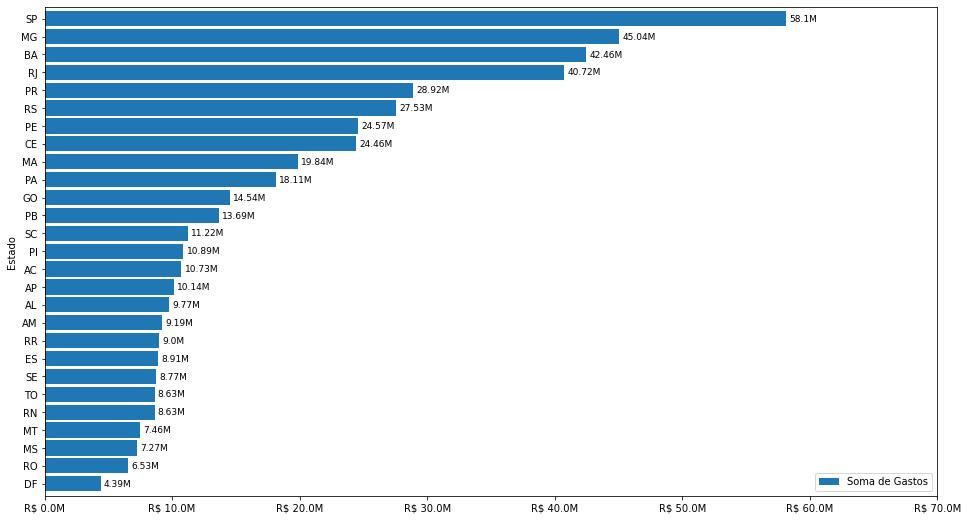

In [175]:
odilon.valor_total_de_gasto_estado(dado)

col = ['sgUF', 'vlrDocumento']
gastos_estado = dado[col]
sge = utils.soma_gastos(gastos_estado)
sge = sge.sort_values('vlrDocumento')
sge.columns = ['Estado', 'Soma de Gastos']

mx = 70_000_000

fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
sge.set_index('Estado').plot.barh(
    figsize=(16,9),
    width=.85,
    ax=ax
)

ax.set_facecolor('white')

# Ajustar As Anotações
ax.set_xlim(0, mx)
labels = (sge['Soma de Gastos'] / 1_000_000).round(2).to_numpy()
for x, y in enumerate(sge['Soma de Gastos']):
    text = f'{labels[x]}M'
    ax.annotate(text,(y + 250000, x), va='center', fontsize=9)
ax.legend(loc=4)

# Ajustar o Eixo X

yticks = [x for x in range(0, mx+1, int(mx/7))]

ax.set_xticks(yticks)


yticks = [f'R$ {x/1000000}M' for x in yticks]
ax.set_xticklabels(yticks)

## 8. Quais estados possuem maior número de representantes?

Baseado nesses [dados](https://www2.camara.leg.br/a-camara/conheca/numero-de-deputados-por-estado),sabemos que os estados com maiores número de parlamentares são:
- **São Paulo**: 70 Deputados
- **Minas Gerais**: 53 Deputados
- **Rio De Janeiro**: 46 Deputados
- **Bahia**: 39 Deputados

A quantidade de Parlamentares por Estado é proporcional à População do Estado.
O fato dos valores serem discrepantes do dado fornecido pela Câmara é devido à não exclusão dos dados dessa Análise.
Muitos candidatos abriram mão do Cargo para assumirem outras posições, como Prefeituras, Ministérios ou simplesmente renunciaram.

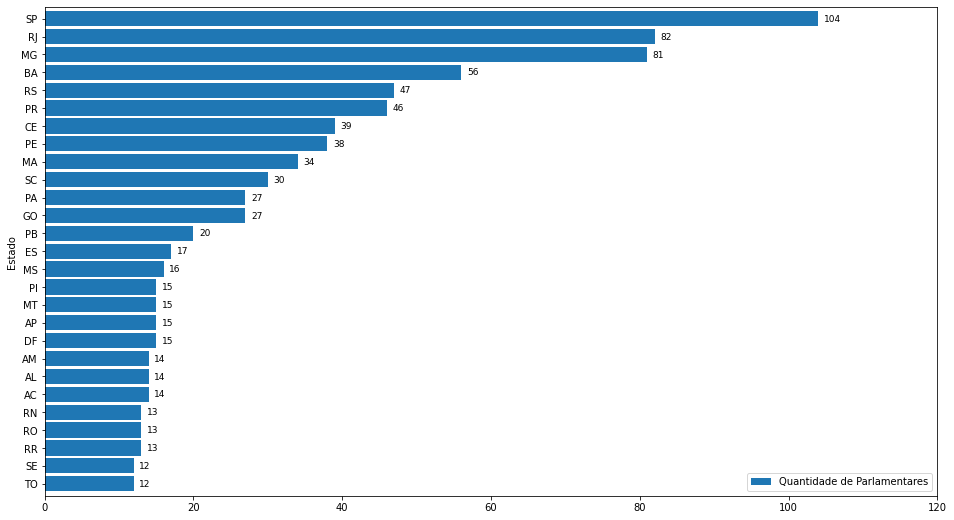

In [ ]:
col = ['sgUF', 'txNomeParlamentar']
npe = dado[col].drop_duplicates().copy()

npe = npe.groupby('sgUF').count().reset_index()
npe.columns = ['Estado', 'Quantidade de Parlamentares']
npe = npe.sort_values('Quantidade de Parlamentares')
npe

mx = 120

fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
npe.set_index('Estado').plot.barh(
    figsize=(16,9),
    width=.85,
    ax=ax
)

ax.set_facecolor('white')

# Ajustar As Anotações
ax.set_xlim(0, mx)
labels = npe['Quantidade de Parlamentares'].to_numpy()
for x, y in enumerate(npe['Quantidade de Parlamentares']):
    text = f'{labels[x]}'
    ax.annotate(text,(y+0.75, x), va='center', fontsize=9)
ax.legend(loc=4)

## 9. Há alguma correlação entre a quantidade de parlamentares por estado e o valor total dos gastos ?

- Há uma Correlação de Positiva e Forte.
- Pelo gráfico de regressão, podemos perceber que há um crescimento proporcional entre Quantidade de Parlamentares por Estado e o Valor Total Gasto por Estado.
- Isso indica que sim, há uma correlação entre Quantidade de Parlamentares por Estado e o Valor Total Gasto por Estado.

,Soma de Gastos por Estado,Quantidade de Parlamentares
Soma de Gastos por Estado,1.00,0.97
Quantidade de Parlamentares,0.97,1.00


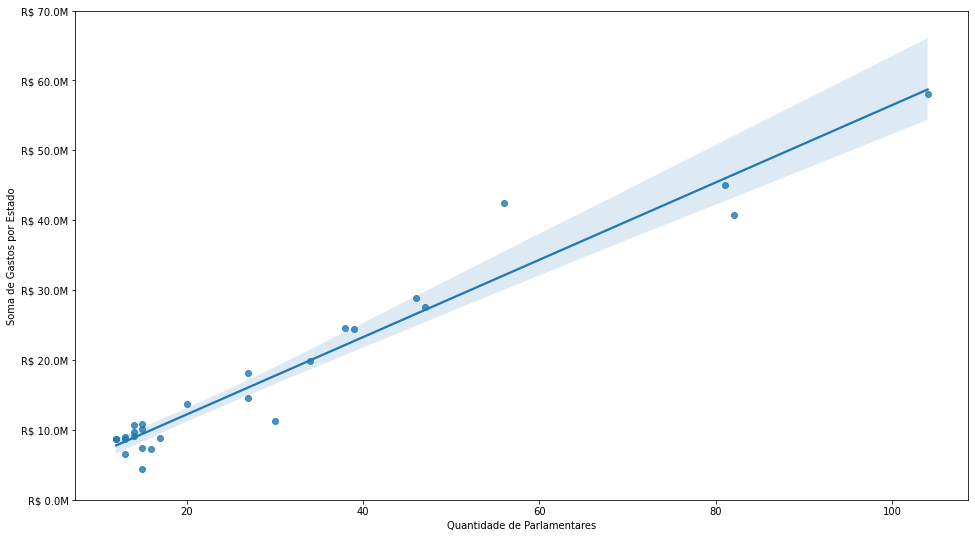

In [ ]:
col = ['sgUF', 'vlrDocumento']
gastos_estado = dado[col]
sge = utils.soma_gastos(gastos_estado)
sge = sge.sort_values('vlrDocumento')
sge.columns = ['Estado', 'Soma de Gastos']

col = ['sgUF', 'txNomeParlamentar']
npe = dado[col].drop_duplicates().copy()

npe = npe.groupby('sgUF').count().reset_index()
npe.columns = ['Estado', 'Quantidade de Parlamentares']
npe = npe.sort_values('Quantidade de Parlamentares')

my = 70_000_000
mx = 120
cpg = pd.DataFrame()

cpg = pd.concat([sge['Soma de Gastos'], npe['Quantidade de Parlamentares']], axis=1)
cpg.columns = ['Soma de Gastos por Estado', 'Quantidade de Parlamentares']
display(cpg.corr())

fig, ax = plt.subplots(figsize=(16,9))
fig.patch.set_facecolor('white')

sns.regplot(y='Soma de Gastos por Estado', x='Quantidade de Parlamentares', data=cpg, ax=ax)

yticks = [x for x in range(0, my+1, int(my/7))]

# for y in yticks:
#     print(y)

ax.set_yticks(yticks)

yticks = [f'R$ {x/1_000_000}M' for x in yticks]
ax.set_yticklabels(yticks);

## 10. Qual a média de gastos por partido?

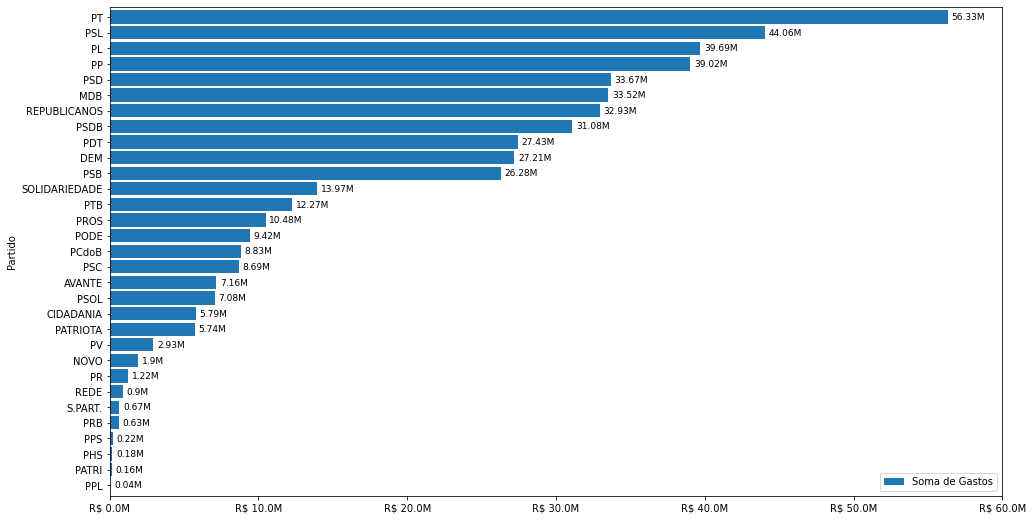

In [ ]:
col = ['sgPartido', 'vlrDocumento']
npp = dado[col].copy()

npp = utils.soma_gastos(npp)
npp.columns = ['Partido', 'Soma de Gastos']
npp = npp.sort_values('Soma de Gastos')

mx = 60_000_000

fig, ax = plt.subplots()

fig.patch.set_facecolor('white')

npp.set_index('Partido').plot.barh(
    figsize=(16,9),
    width=.85,
    ax=ax
)

ax.set_facecolor('white')

# Ajustar As Anotações
ax.set_xlim(0, mx)

labels = (npp['Soma de Gastos'] / 1_000_000).round(2).to_numpy()
for x, y in enumerate(npp['Soma de Gastos']):
    text = f'{labels[x]}M'
    ax.annotate(text,(y + 250000, x), va='center', fontsize=9)
ax.legend(loc=4)

# Ajustar o Eixo X

yticks = [x for x in range(0, mx+1, int(mx/6))]

ax.set_xticks(yticks)


yticks = [f'R$ {x/1000000}M' for x in yticks]
ax.set_xticklabels(yticks)

##  11. Quais são os partidos que mais e que menos consumiram a cota parlamentar?

O partido que mais gastou foi o **PT**, com aproximadamente **56.3 Milhões de Reais**, enquanto o **PPL** gastou em torno de **45 Mil Reais**.

In [ ]:
colunas_analisadas = ['vlrDocumento', 'sgPartido']
soma_gasto_partido = utils.soma_gastos(
    dado[colunas_analisadas]).sort_values(colunas_analisadas)


numeric_columns = soma_gasto_partido.select_dtypes(float).columns
idx = [
    soma_gasto_partido.vlrDocumento.idxmax(),
    soma_gasto_partido.vlrDocumento.idxmin()
]

soma_gasto_partido.loc[idx].set_index('sgPartido')


,vlrDocumento
sgPartido,
PT,"56,328,962.20"
PPL,"44,925.75"


##  12. Há alguma correlação entre a quantidade de parlamentares por partido e o valor total dos gastos?

- Há uma Correlação de Positiva e Forte.
- Pelo gráfico de regressão, podemos perceber que há um crescimento proporcional entre Quantidade de Parlamentares por Partido e o Valor Total Gasto por Partido.
- Isso indica que sim, há uma correlação entre Quantidade de Parlamentares por Partido e o Valor Total Gasto por Partido.

,Soma de Gastos por Partido,Quantidade de Parlamentares
Soma de Gastos por Partido,1.00,0.91
Quantidade de Parlamentares,0.91,1.00


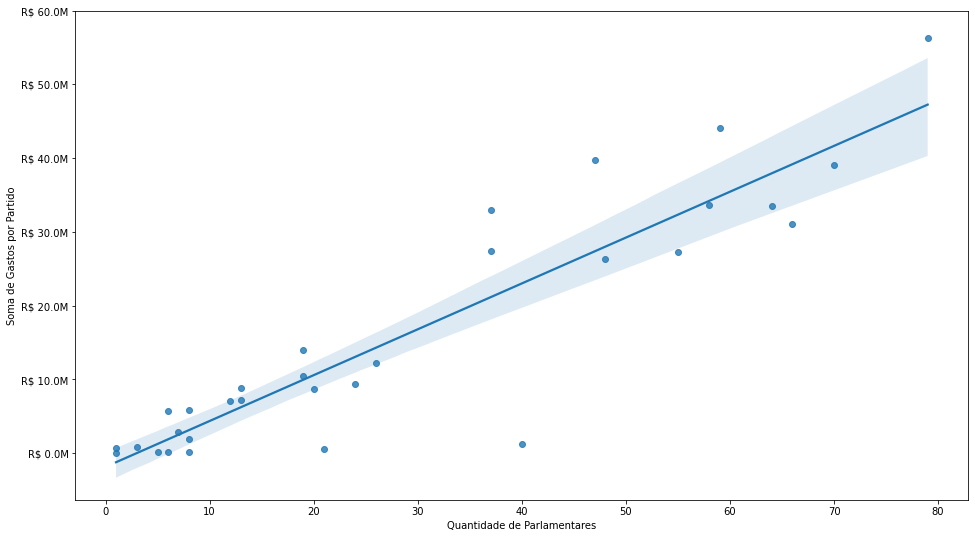

In [179]:
col = ['sgPartido', 'txNomeParlamentar']
npp = dado[col].drop_duplicates().copy()

npp = npp.groupby('sgPartido').count().reset_index()
npp.columns = ['Partido', 'Quantidade de Parlamentares']
npp = npp.sort_values('Quantidade de Parlamentares')

colunas_analisadas = ['sgPartido', 'vlrDocumento']
sgp = utils.soma_gastos(dado[colunas_analisadas]).sort_values('vlrDocumento')
sgp.columns = ['Partido', 'Soma de Gastos por Partido']

csgp =  sgp.set_index('Partido').join(npp.set_index('Partido'))

display(csgp.corr())
my = 60_000_000
fig, ax = plt.subplots(figsize=(16,9))
fig.patch.set_facecolor('white')

sns.regplot(data=csgp, x='Quantidade de Parlamentares', y='Soma de Gastos por Partido')

yticks = [x for x in range(0, my+1, int(my/6))]

ax.set_yticks(yticks)

yticks = [f'R$ {x/1_000_000}M' for x in yticks]
ax.set_yticklabels(yticks);